In [30]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

from matplotlib.image import imread
from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier

from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

# CLUSTERING

K-MEANS

In [2]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [3]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

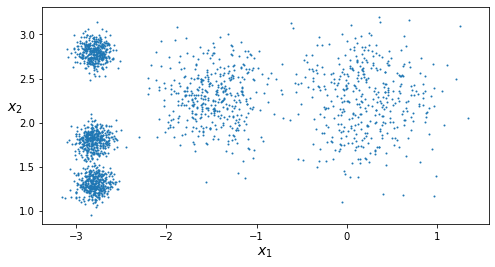

In [4]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [11]:
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

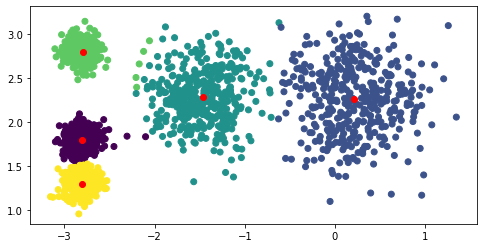

In [6]:
plt.figure(figsize=(8, 4))
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_.astype(float))
for centroide in kmeans.cluster_centers_:
    plt.scatter(centroide[0], centroide[1], c = "r")
plt.show()

# Problemas na clusterização: K-Means não performa bem quando os agrupamentos têm diâmetros muito diferentes, uma vez que tudo com que
# ele se importa é a distância da observação ao centroide.

In [7]:
# Distância de cada observação para cada centroide

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.transform(X_new)

# A primeira observação está situada a uma distância de 2,81 do primeiro centroide; de 0,33 do segundo, etc.

array([[2.81093633, 0.32995317, 1.49439034, 2.9042344 , 2.88633901],
       [5.80730058, 2.80290755, 4.4759332 , 5.84739223, 5.84236351],
       [1.21475352, 3.29399768, 1.69136631, 0.29040966, 1.71086031],
       [0.72581411, 3.21806371, 1.54808703, 0.36159148, 1.21567622]])

In [8]:
# MÉTODOS DE INICIALIZAÇÃO DE CENTROIDES

# Quando já se tem ideia de onde os centroides devem estar (aproximadamente)

good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

# Rodando o algoritmo múltiplas vezes com diferentes inicializações, mantendo a melhor solução
inercia = kmeans.inertia_    # MEDIDA DE PERFORMANCE: Soma do quadrado da distância entre cada observação e seu centroide mais próximo
                            # RODAR ".FIT_TRANSFORM(X) ANTES"
score = kmeans.score(X)

# K-MEANS ++

# Inicialização que tende a selecionar centroides que estão distandes uns dos outros, diminuindo a probabilidade de que o algoritmo convirja a uma solução
# subótima
# Utilizado por padrão pelo Scikit-learn. Para usar o método original: init = 'random'

AttributeError: 'KMeans' object has no attribute 'inertia_'

In [9]:
# MINIBATCH

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

# Embora mais rápido que o algoritmo normal, tem uma inércia (.inertia_) geralmente pior

C:\Users\matheus.vizzotto\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=5)

In [12]:
# ESCOLHENDO O NÚMERO DE CLUSTERS

# Inércia não é uma boa medida, uma vez que diminui conforme se aumenta 'k'

# Pontuação de SILHUETA: (b-a)/max(a,b) 
# sendo 'a' a distância média intra-cluster e 'b' a distância ao cluster mais próximo
# +1 = cluster certo; -1 = cluster errado

silhouette_score(X, kmeans.labels_)

0.655517642572828

In [13]:
# CLUSTER PARA PRÉ-PROCESSAMENTO

X_digits, y_digits = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\matheus.vizzotto\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
log_reg.score(X_test, y_test)

0.9511111111111111

In [15]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression()),
    ])
pipeline.fit(X_train, y_train)

C:\Users\matheus.vizzotto\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression())])

In [16]:
pipeline.score(X_test, y_test)

0.9555555555555556

In [ ]:
# GRID SEARCH PARA ENCONTRAR O NÚMERO DE CLUSTER QUE GERA A MELHOR PERFORMANCE NO CROSS-VALIDATION

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

In [ ]:
grid_clf.best_params_

In [ ]:
grid_clf.score(X_test, y_test)

DBSCAN

In [17]:
# DEFINE CLUSTERS COMO REGIÕES CONTÍNUAS DE ALTA DENSIDADE

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [18]:
dbscan.labels_[:20]  # -1 = anomalia

array([ 0,  1,  4,  2,  7, -1,  1,  3,  4,  5,  3,  4,  2,  4,  6,  7,  4,
        3,  3,  4], dtype=int64)

In [19]:
len(dbscan.core_sample_indices_) #índice das observações principais
dbscan.core_sample_indices_ #índice das observações principais (core instances)
dbscan.components_ # observações principais

array([[-0.45430333,  0.87598049],
       [ 2.04228277,  0.25182633],
       [ 0.91257899,  0.19694326],
       ...,
       [ 1.769029  , -0.15651659],
       [-0.20548828,  0.96380986],
       [ 0.69675956,  0.80107206]])

In [20]:
# DBSCAN não tem "predict()"; usar algoritmos de classificação sobre os componentes obtidos

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)
knn.predict_proba(X_new)

array([[0.58, 0.  , 0.  , 0.  , 0.18, 0.  , 0.  , 0.  , 0.  , 0.  , 0.24,
        0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ],
       [0.  , 0.  , 0.72, 0.  , 0.16, 0.  , 0.  , 0.  , 0.12, 0.  , 0.  ,
        0.  , 0.  ],
       [0.  , 0.94, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.06, 0.  ]])

OUTROS ALGORITMOS DE CLUSTERIZAÇÃO

1. Clustering aglomerativo
2. BIRCH
3. Mean-Shift
4. Propagação de afinidade
5. Clustering espectral


# MODELO DE MISTURAS GAUSSIANAS (GAUSSIAN MIXTURE MODELS - GMM)

In [21]:
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [22]:
gm.weights_

gm.means_

gm.covariances_

array([[[ 0.05213418,  0.06131818],
        [ 0.06131818,  0.08592264]],

       [[ 0.05742225,  0.06667475],
        [ 0.06667475,  0.09186652]],

       [[ 0.166278  , -0.09989638],
        [-0.09989638,  0.28891498]]])

In [23]:
# ALGORITMO CONVERGIU?
gm.converged_
# QUANTAS ITERAÇÕES?
gm.n_iter_

15

In [24]:
# HARD CLUSTERING
gm.predict(X)
# SOFT CLUSTERING
gm.predict_proba(X)

array([[1.93098571e-216, 9.53485539e-001, 4.65144609e-002],
       [9.99876643e-001, 1.08537232e-216, 1.23356791e-004],
       [3.31551356e-041, 7.81227797e-069, 1.00000000e+000],
       ...,
       [2.68443328e-189, 2.16681860e-001, 7.83318140e-001],
       [9.94959084e-001, 7.08642944e-202, 5.04091614e-003],
       [9.00607181e-074, 8.43131074e-038, 1.00000000e+000]])

In [26]:
# DETECÇÃO DE ANOMALIAS USANDO GM

# ANOMALIAS CONSIDERANDO A RAZÃO DE PRODUTOS DEFEITUOSOS COMO 4%

densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

In [29]:
# SELECIONANDO MODELO POR MEIO DE CRITÉRIO DE INFORMAÇÃO

print(gm.bic(X), gm.aic(X))

# BIC: MODELO MAIS SIMPLES, MAS COM MENOR AJUSTE QUE O DO AIC (QUANDO DIFEREM)

2724.7493817756435 2641.317542032947


In [32]:
# BAYESIAN GMM

# Escolher um número de clusters superior àquele que se acredita ser o ótimo; o algoritmo eliminará os desnecessários automaticamente.

bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

C:\Users\matheus.vizzotto\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


array([0.12, 0.12, 0.13, 0.1 , 0.16, 0.15, 0.12, 0.11, 0.  , 0.  ])

Outros algoritmos para detecção de anomalias

1. PCA
2. Fast-MCD
3. Isolation Forest
4. Local Outlier Factor (LOF)
5. One-class SVM